# How to plot with matplotlib

In [1]:
import peaky_data
import hierarchical_peaks as hip
import peaks_in_matplotlib
import utilities

#%matplotlib inline

## A basic plot: "Hello, tree!"
We begin by generating data by a random walk and then we generate a PeakTree for that data.

How to plot this `tree`? Well, PeakTree objects do not have a native plot method, but a PeakTreePlotter object, when instantiated, becomes available as `tree.plot`. This PeakTreePlotter has an `arrows` method, that plots arrows to nodes from their parent nodes.

The `tree.plot.ax` is the Axes instance, with all its matplotlib methods available, and here we use `set_title`.

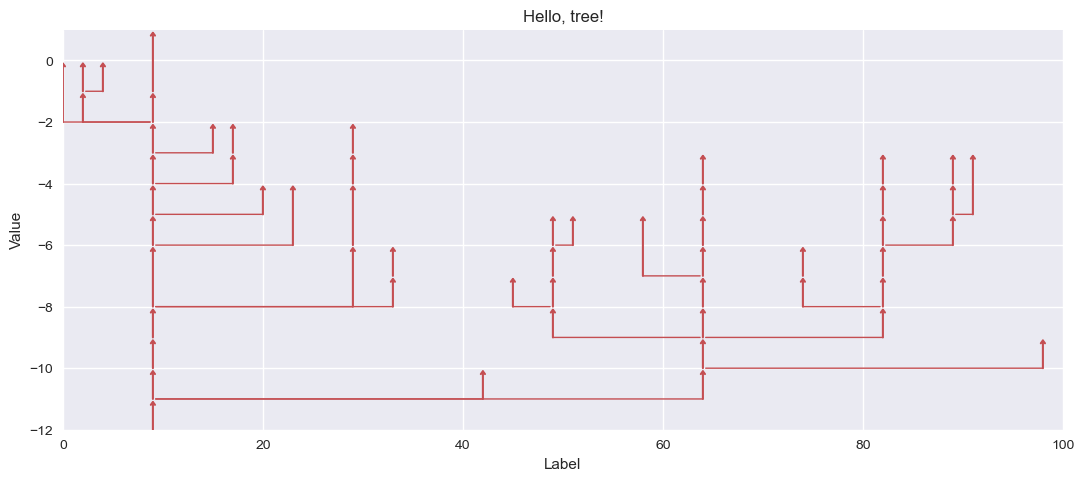

In [2]:
y = peaky_data.randomwalk()
tree = hip.PeakTree(enumerate(y))
peaks_in_matplotlib.PeakTreePlotter(tree)
tree.plot.arrows()
tree.plot.ax.set_title('Hello, tree!');

## Improving the tree plot
- We plot the random walk together with the tree
- Thicker lines
- Different arrow colors. Each node in the tree (except the root) is either a low or a high descendant (child) of its parent node, and colors can illustrate the difference: Red ('C2') for low descendants and green ('C1') for high descendants.

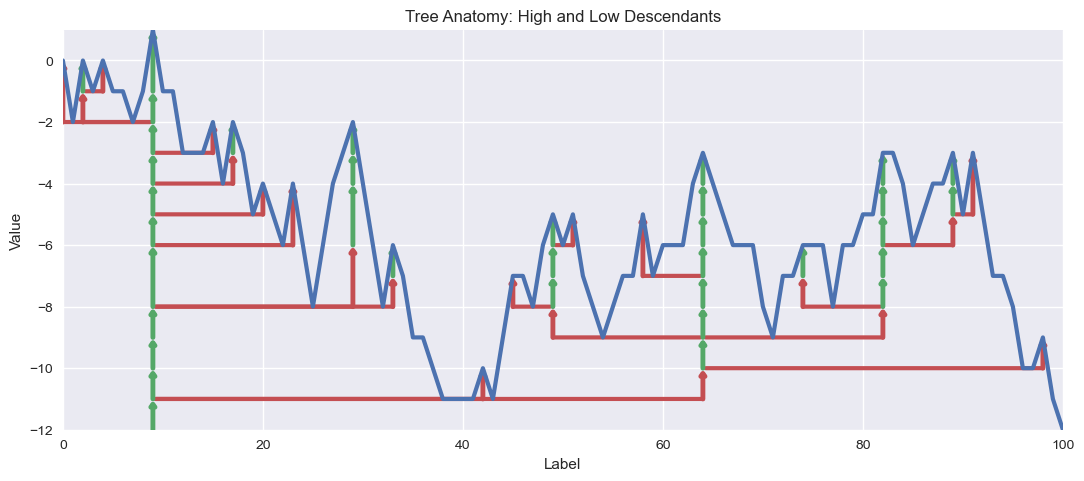

In [2]:
y = peaky_data.randomwalk()
tree = hip.PeakTree(enumerate(y))
peaks_in_matplotlib.PeakTreePlotter(tree)

tree.plot.arrows(tree.low_descendants(), color='C2', linewidth=3)
tree.plot.arrows(tree.high_descendants(), color='C1', linewidth=3)
tree.plot.ax.set_title('Tree Anatomy: High and Low Descendants');
tree.plot.ax.plot(y, linewidth=3);

## Plotting the peaks in data
In this example, we use another PeakTreePlotter method called `bounding_boxes` to highlight a set of peaks in data.

The `bounding_boxes` requires the locations of peaks (their interval on x-axis) to be known. Therefore, during PeakTreePlotter instantiation, a `xinterval` parameter is set.

Also, we elaborate on the data set: The random walk is made longer. Longer moves are possible. And an `x` is provided to accompany the `y`.

Bounding boxes are then plotted around all peaks of a certain size (maxsize=7).

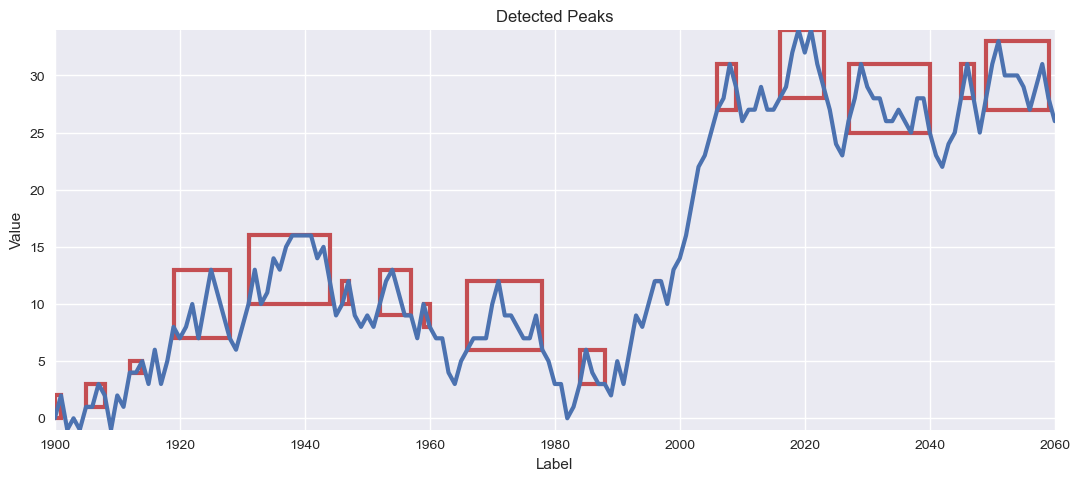

In [3]:
x = list(range(1900,2061))
y = peaky_data.randomwalk(
    steps=peaky_data.discrete_steps(
            length=160,
            moves=[-3, -2, -1, 0, 1, 2, 3],
            ),
    )
tree = hip.PeakTree(zip(x, y))
peaks_in_matplotlib.PeakTreePlotter(
    tree,
    xinterval=hip.peak_locations([(x, tree.base_height(x)) for x in tree], zip(x, y))
    )

tree.plot.bounding_boxes(tree.filter(maxsize=7.0))
tree.plot.ax.set_title('Detected Peaks')
tree.plot.ax.plot(x, y, linewidth=3);